MNIST
We're going to tackle a classic machine learning problem : MNIST handwritten digit classification.
It's simple : given an image, classify it as a digit.
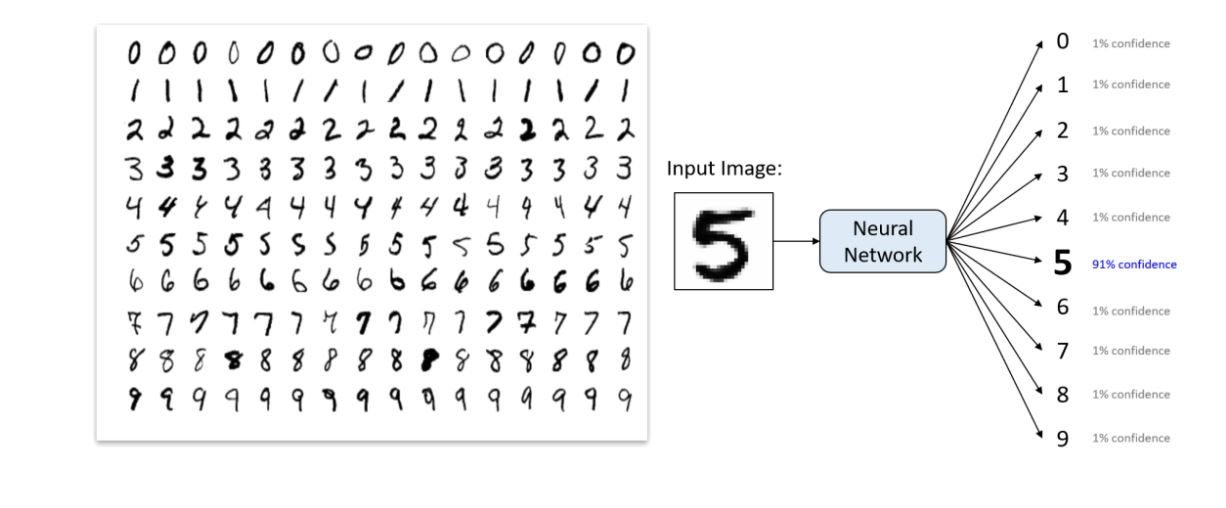

Each image in the MNIST dataset is 28x28 and contains a centered, grayscale digit. We'll flatten each 28x28 into a 784 dimensional vector, which we'll use as an input vector to our neural network.

Our target will be one of 10 possible classes: one for each digit.



In [ ]:
!pip install mnist
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
import mnist

Gather Mnist Data

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

Preprocessing


In [ ]:
# Normalize the images. 
# The pixel value is a single number that represents the brightness of the pixel, typically zero is taken to be black, and 255 is taken to be #white. After normalization we will get values between 0 and 1
train_images = (train_images / 255) 
test_images = (test_images / 255) 

# Flatten the images.
train_images = train_images.reshape((-1, 784)) 
test_images = test_images.reshape((-1, 784))

MNIST - Model -
To build our model we'll be using the Sequential model, since our network is indeed a linear stack of layers. The Sequential constructor takes an array of Keras Layers.
We're building a standard feedforward network, we only need Dense layers, which is your regular fully-connected (dense) network layer.

The first two layers have 64 nodes each and use the ReLU activation function. The last layer is a Softmax output layer with 10 nodes, one for each class.

In [ ]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')])

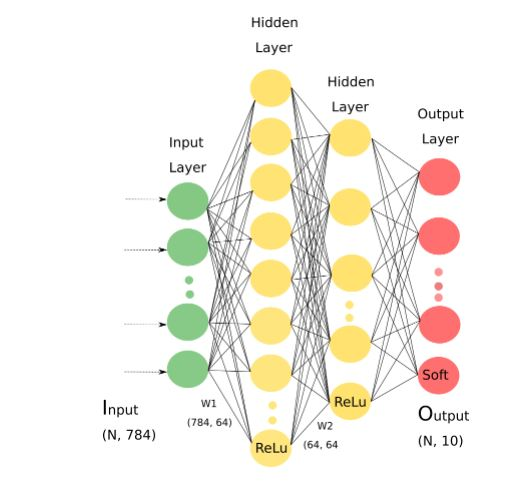

But Before we can start training, we need to configure our Keras model. We decide 3 key factors during the compilation step: Optimizer - Loss function - Metrics.

In [ ]:
# Compile K model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

Training a model in Keras literally consists only of calling fit() and specifying some parameters. Remember that training consists of setting the best weights for your data.

In [ ]:
history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
  validation_data=(test_images, to_categorical(test_labels)))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2767 - accuracy: 0.9202 - val_loss: 0.1515 - val_accuracy: 0.9523
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1280 - accuracy: 0.9614 - val_loss: 0.1134 - val_accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0928 - accuracy: 0.9721 - val_loss: 0.1070 - val_accuracy: 0.9659
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9770 - val_loss: 0.1083 - val_accuracy: 0.9682
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0593 - accuracy: 0.9815 - val_loss: 0.0976 - val_accuracy: 0.9710


Reviewing plots of your performance measure can be very useful, remember how to do that ? No worries, we'll do it again and again.

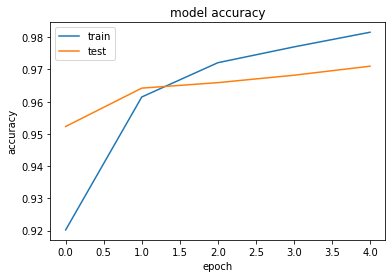

In [ ]:
import matplotlib.pyplot as plt 
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Remember that data splitting is a crucial step to evaluate your model performance. In fact, the real challenge will be seeing how our model performs on our test data.

In [ ]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels))

313/313 [==============================] - 0s 1ms/step - loss: 0.0976 - accuracy: 0.9710


[0.0976453572511673, 0.9710000157356262]